<a href="https://colab.research.google.com/github/shekarroy15/Our-Capstone-Project/blob/main/Roboflow_Train_YOLOv5_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone YOLOv5 repo

In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
# !git reset --hard 4effd064b169fc049b4a4bca401b120bf2e93c14

Cloning into 'yolov5'...
remote: Enumerating objects: 11387, done.
remote: Total 11387 (delta 0), reused 0 (delta 0), pack-reused 11387
Receiving objects: 100% (11387/11387), 11.29 MiB | 3.75 MiB/s, done.
Resolving deltas: 100% (7856/7856), done.
/content/yolov5
HEAD is now at 4effd06 Consistent saved_model output format (#7032)


#Install Dependencies

In [ ]:
# install dependencies
!pip install -qr requirements.txt

In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images
from utils.downloads import gdrive_download  # to download models/datasets
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 596 kB 13.7 MB/s 
Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# Download Correctly Formatted Custom Dataset

In [ ]:
!pip install -q roboflow

     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 1.1 MB 63.1 MB/s 
     |████████████████████████████████| 145 kB 63.4 MB/s 
     |████████████████████████████████| 138 kB 55.9 MB/s 
     |████████████████████████████████| 178 kB 88.9 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=roboflow-yolov5


In [ ]:
%cd /content/yolov5
from roboflow import Roboflow
rf = Roboflow(api_key="qc2df0g3q9cPkNKbc7vP")
project = rf.workspace("shekar-roy").project("stanford-cars-1ztb1")
dataset = project.version(3).download("yolov5")

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to stanford-cars-3 in yolov5pytorch:: 100%|██████████| 58038/58038 [00:09<00:00, 5890.43it/s]


In [ ]:
# Validate label YAML
%cat {dataset.location}/data.yaml

names:
- '1'
- '10'
- '100'
- '101'
- '102'
- '103'
- '104'
- '105'
- '106'
- '107'
- '108'
- '109'
- '11'
- '110'
- '111'
- '112'
- '113'
- '114'
- '115'
- '116'
- '117'
- '118'
- '119'
- '12'
- '120'
- '121'
- '122'
- '123'
- '124'
- '125'
- '126'
- '127'
- '128'
- '129'
- '13'
- '130'
- '131'
- '132'
- '133'
- '134'
- '135'
- '136'
- '137'
- '138'
- '139'
- '14'
- '140'
- '141'
- '142'
- '143'
- '144'
- '145'
- '146'
- '147'
- '148'
- '149'
- '15'
- '150'
- '151'
- '152'
- '153'
- '154'
- '155'
- '156'
- '157'
- '158'
- '159'
- '16'
- '160'
- '161'
- '162'
- '163'
- '164'
- '165'
- '166'
- '167'
- '168'
- '169'
- '17'
- '170'
- '171'
- '172'
- '173'
- '174'
- '175'
- '176'
- '177'
- '178'
- '179'
- '18'
- '180'
- '181'
- '182'
- '183'
- '184'
- '185'
- '186'
- '187'
- '188'
- '189'
- '19'
- '190'
- '191'
- '192'
- '193'
- '194'
- '195'
- '196'
- '2'
- '20'
- '21'
- '22'
- '23'
- '24'
- '25'
- '26'
- '27'
- '28'
- '29'
- '3'
- '30'
- '31'
- '32'
- '33'
- '34'
- '35'
- '36'
- '37'
- '

# Define Model Configuration and Architecture

In [ ]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
# model configuration
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
# customize iPython writefile to write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# Train Custom YOLOv5 Detector

Arguments available:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
# train yolov5s on custom data for 300 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 32 --epochs 300 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=/content/yolov5/stanford-cars-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-39-g4effd06 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.

# Evaluate Custom YOLOv5 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`. (If given no name, it defaults to `results.txt`.) The results file is plotted as a png after training completes.

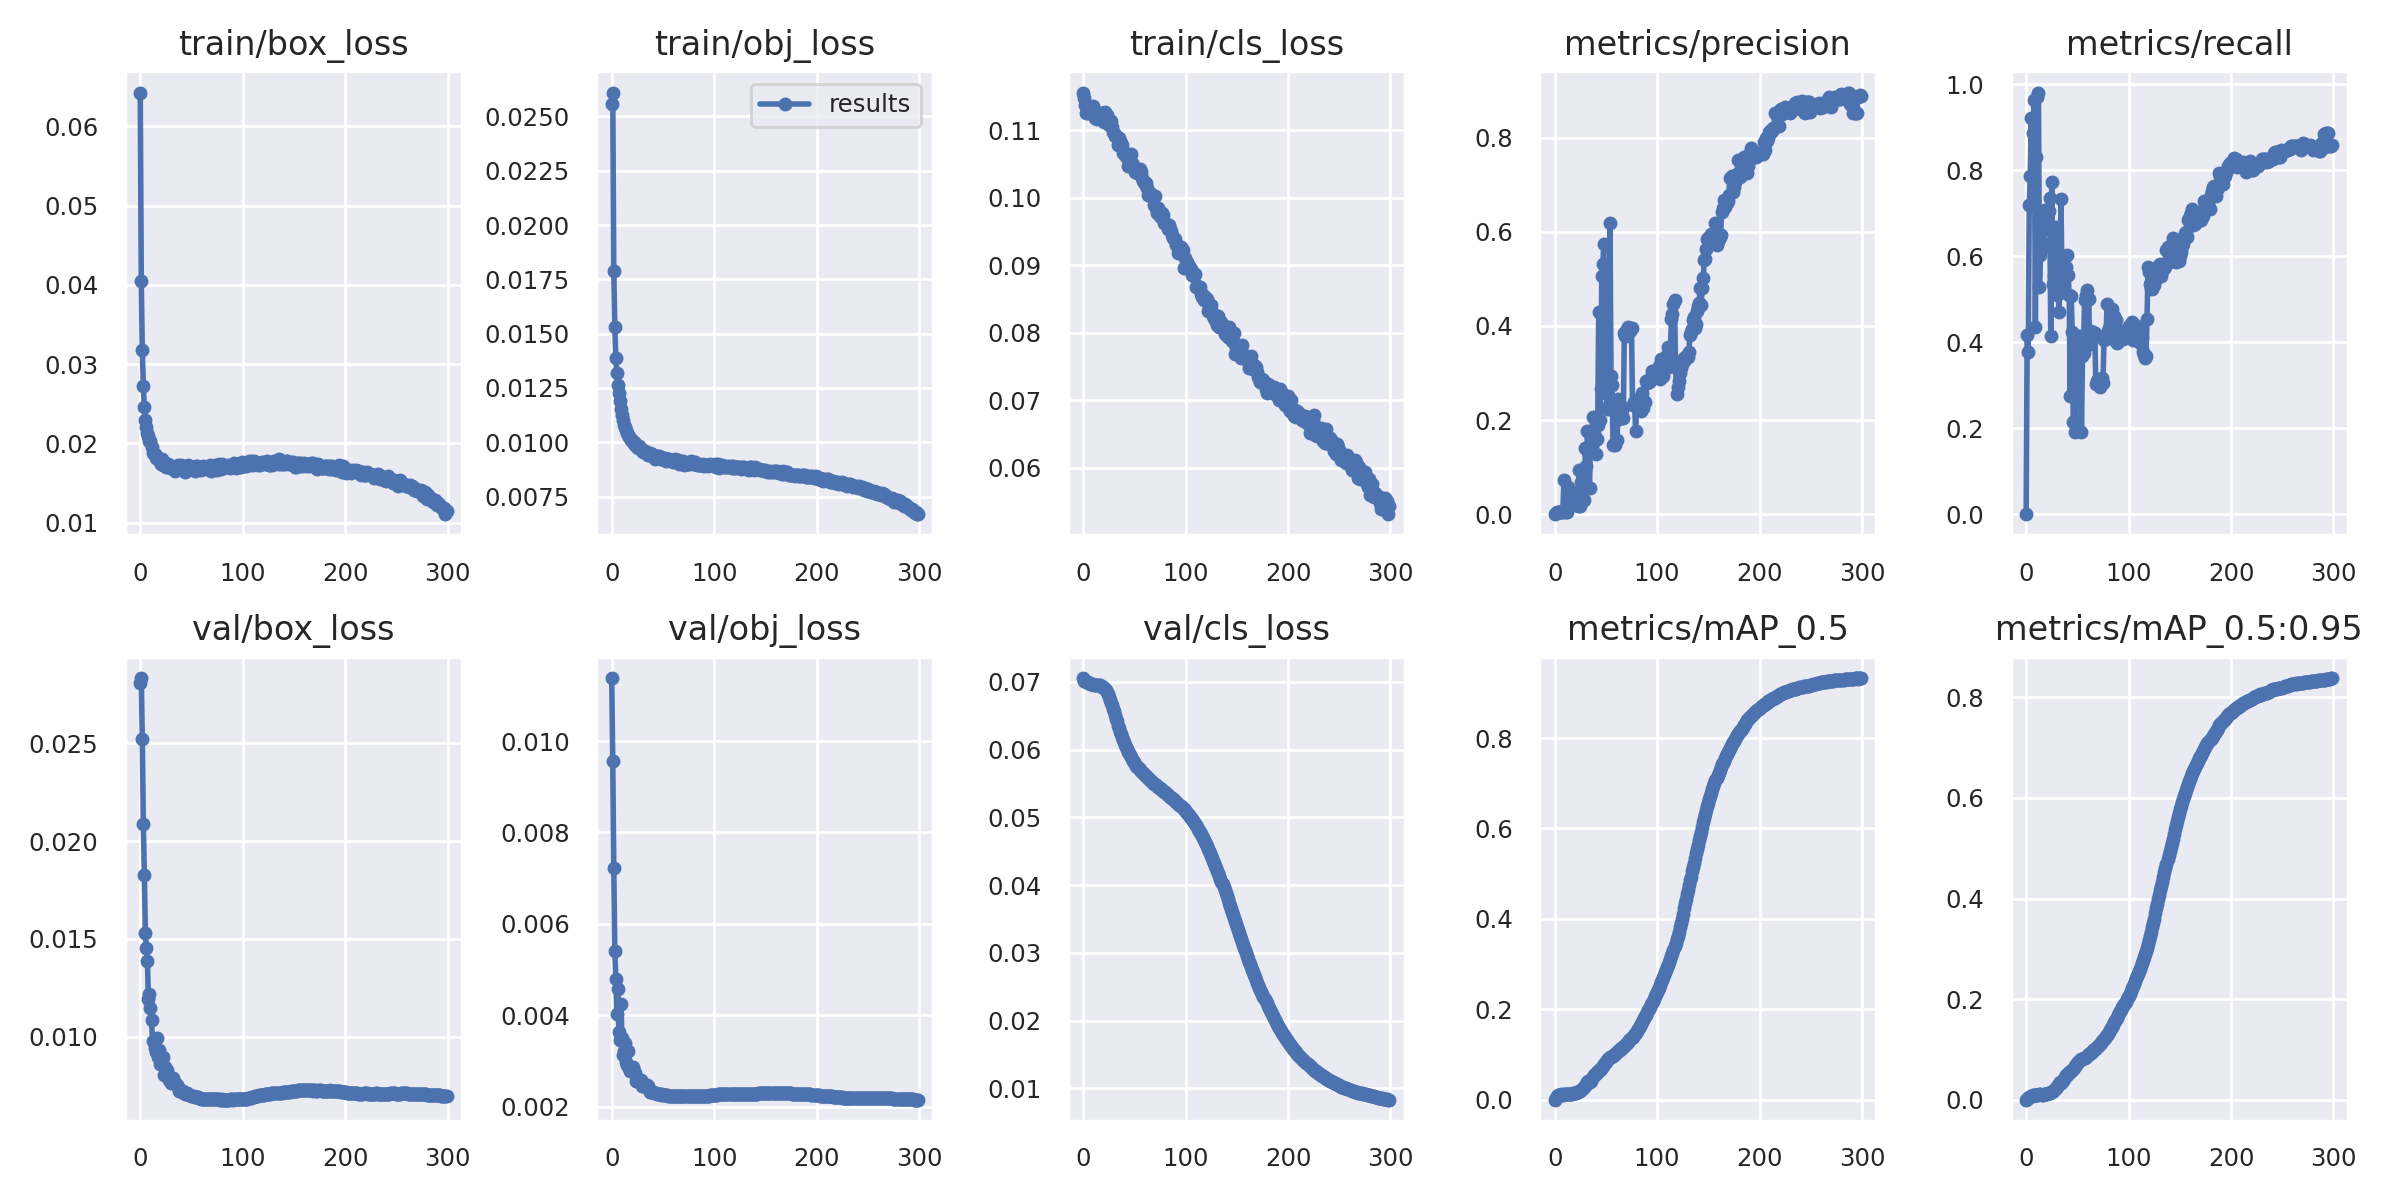

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source /content/yolov5/stanford-cars-3/test/images

Streaming output truncated to the last 5000 lines.
image 3032/8029 /content/yolov5/stanford-cars-3/test/images/03042_jpg.rf.4766f3002801c3c2320330aeff8ea4d7.jpg: 416x416 1 178, 1 183, Done. (0.009s)
image 3033/8029 /content/yolov5/stanford-cars-3/test/images/03043_jpg.rf.d9efa2d51ce2ba7cf6ae4775a879cf35.jpg: 416x416 1 36, Done. (0.009s)
image 3034/8029 /content/yolov5/stanford-cars-3/test/images/03044_jpg.rf.5ceb32ee7ceeb9b0a5f5806f96062859.jpg: 416x416 1 106, Done. (0.009s)
image 3035/8029 /content/yolov5/stanford-cars-3/test/images/03045_jpg.rf.0b7e275eaf04d1e7c3d3c44a01d176e6.jpg: 416x416 1 34, Done. (0.009s)
image 3036/8029 /content/yolov5/stanford-cars-3/test/images/03046_jpg.rf.b3af331570780d046f6f16d494927a50.jpg: 416x416 1 36, Done. (0.009s)
image 3037/8029 /content/yolov5/stanford-cars-3/test/images/03047_jpg.rf.785366e6cefb49e91db7d65cd53a5887.jpg: 416x416 Done. (0.009s)
image 3038/8029 /content/yolov5/stanford-cars-3/test/images/03048_jpg.rf.c7444ecdfe8d1775dfe485db54cac691.

# Export Trained Weights for Future Inference

Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/drive/MyDrive